In [2]:
import matplotlib.pyplot as pl
import numpy as np
import altair as alt

In [3]:
d = np.load('/home/mu/Dokumente/Karten/Playground/distance-677-1.npy')
d.shape

(22, 7950)

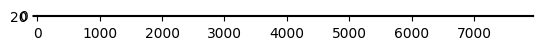

In [5]:
pl.clf()
pl.imshow(d)
pl.show()

In [23]:
somewhat_close_mask = np.min(d, axis=0) < 200

In [24]:
d2 = d[:, somewhat_close_mask]
d2.shape

(22, 227)

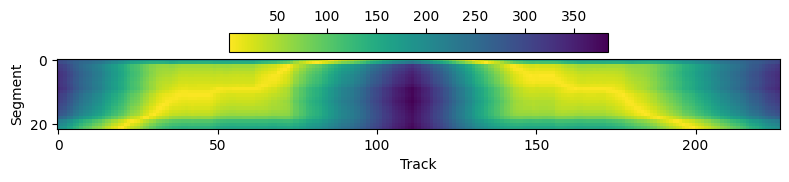

In [37]:
pl.clf()
pl.imshow(d2, cmap='viridis_r')
pl.colorbar(location="top")
pl.gcf().set_size_inches((8, 1.8))
pl.xlabel('Track')
pl.ylabel('Segment')
pl.tight_layout()
pl.savefig('docs/images/segment-distance-im.svg')
pl.show()

In [46]:
close_mask = np.min(d, axis=0) < 100

In [47]:
close_mask.shape, np.diff(close_mask).shape

((7950,), (7949,))

In [57]:
mask_diff = np.diff(np.array(close_mask, dtype=np.int32))
begins = np.where(mask_diff == 1)[0]
ends = np.where(mask_diff == -1)[0]
begins, ends

(array([ 309, 7583]), array([ 398, 7673]))

In [60]:
for begin, end in zip(begins, ends):
    d_slice = d[:, begin:end]
    min_d = np.min(d_slice, axis=1)
    index = begin + np.argmin(d_slice, axis=1)
    print(np.max(min_d), index)

7.064837482027586 [387 382 373 372 370 369 369 367 365 357 349 343 338 335 334 333 332 331
 328 324 322 321]
4.1317521518741565 [7591 7595 7604 7605 7607 7613 7610 7618 7620 7623 7636 7638 7639 7640
 7641 7642 7644 7645 7649 7655 7657 7660]
